<a href="https://colab.research.google.com/github/EldritchBear/ADA-Informes/blob/main/MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de Ordenamiento

Los problemas de ordenamiento a pesar de que son de planteamiento facil presentan un nivel de complejidad notable y muchas personas han sido atraidas a tratar con este reto, resultando en varios algoritmos de ordenamiento siendo diseñados y cada uno siendo más eficiente que otros.

Entrada: Recibe un arreglo de tamaño n con números

Salida: Retorna el arreglo ordenado, ya sea de menor a mayor o al revéz.


# 2. Merge Sort

El Merge Sort es un algoritmo de ordenamiento que al igual que el insertion sort utiliza la estrategia de "divide y vencerás". Este algoritmo recibe un arreglo el cuál luego es dividido por la mitad formando sub-arreglos que seguirán siendo divididos por las llamadas recursivas hasta que ya no se puedan dividir, luego de esto se comienzan a comparar los arreglos más pequeños, ordenando así los datos, sumando ambos arreglos hasta ordenarlos todos.

In [34]:
cont = 0

def merge(subArreglo1,subArreglo2,verbose):
  i = 0
  k = 0
  largo1 = len(subArreglo1)                 #Conseguimos el largo de ambos subArreglos para poder utilizarlos hasta que uno se queden sin datos,
  largo2 = len(subArreglo2)                 #en el momento que ocurra esto copiaremos el contenido restante del otro en arreglo.
  arreglo = []
  global cont

  if (verbose):
    print("Función merge")
    print("sub arreglos: ",subArreglo1)
    print("              ",subArreglo2)

  while (i < largo1 and k < largo2):       #buscamos el dato menor y usamos el .append para colocar ese dato en arreglo, ya que no tiene memoria
    cont +=1
    if (subArreglo1[i] < subArreglo2[k]):  #asignada como para hacer arreglo[j] = subArreglox[y].
      arreglo.append(subArreglo1[i])
      i = i+1
    else:
      arreglo.append(subArreglo2[k])
      k = k+1

  arreglo = arreglo + subArreglo1[i:]      #cuando un subArreglo se queda sin datos se copia el resto del otro.
  cont = cont + (largo1-i)
  arreglo = arreglo + subArreglo2[k:]
  cont = cont + (largo2-k)

  if (verbose):
    print("Fin del merge")
    print("resultado: ",arreglo)
    print("cantidad de comparaciones: ",cont,"\n")

  return arreglo     

In [27]:
llamadas = 1

def mergeSort(arreglo,verbose = False):
  if (len(arreglo) == 1): return arreglo                      #cuando ya no se pueda seguir dividiendo el arreglo se debe detener.
  subArreglo1 = []
  subArreglo2 = []
  global llamadas

  i = len(arreglo)//2
  llamadas = llamadas + 1
  subArreglo1 = mergeSort(arreglo[i:],verbose)                #comenzamos a dividir los subArreglos hasta no poder más.
  subArreglo2 = mergeSort(arreglo[:i],verbose)
  arreglo = merge(subArreglo1,subArreglo2,verbose)            #ordenamos los subArreglos hasta llegar al arreglo original pero ordenado.
  return arreglo

In [28]:
arreglo = [4,7,2,9,1,3]
verbose = False
print("Arreglo de entrada: ",arreglo)
arreglo = mergeSort(arreglo, verbose)
print("Arreglo de salida:  ",arreglo)
print("Llamadas totales: ",llamadas)
llamadas = 1

Arreglo de entrada:  [4, 7, 2, 9, 1, 3]
Arreglo de salida:   [1, 2, 3, 4, 7, 9]
Llamadas totales:  6


#2.4. Ejecución del algoritmo paso a paso (verbose=True)

In [29]:
arreglo = [4,7,2,9,1,3]
verbose = True

print("Arreglo de entrada: ",arreglo)
arreglo = mergeSort(arreglo, verbose)
print("Arreglo de salida:  ",arreglo)
print("Llamadas totales: ",llamadas)
print("Comparaciones totales",cont)
llamadas = 1
cont = 0

Arreglo de entrada:  [4, 7, 2, 9, 1, 3]
Función merge
sub arreglos:  [3]
               [1]
Fin del merge
resultado:  [1, 3]
cantidad de comparaciones:  12 

Función merge
sub arreglos:  [1, 3]
               [9]
Fin del merge
resultado:  [1, 3, 9]
cantidad de comparaciones:  14 

Función merge
sub arreglos:  [2]
               [7]
Fin del merge
resultado:  [2, 7]
cantidad de comparaciones:  15 

Función merge
sub arreglos:  [2, 7]
               [4]
Fin del merge
resultado:  [2, 4, 7]
cantidad de comparaciones:  17 

Función merge
sub arreglos:  [1, 3, 9]
               [2, 4, 7]
Fin del merge
resultado:  [1, 2, 3, 4, 7, 9]
cantidad de comparaciones:  22 

Arreglo de salida:   [1, 2, 3, 4, 7, 9]
Llamadas totales:  6
Comparaciones totales 22


El algoritmo divide el arreglo hasta llegar a sub-arreglos de tamaño 1, estos comienzan a ser ordenados y se van comparando con el resto de sub-arreglos de mayor tamaño.

# 3. Tiempo de ejecución

El merge sort no presenta un peor caso o un mejor caso, en ambos el algoritmo va a recorrer, dividir y comparar de igual manera, por lo que la complejidad en ambos casos es la misma. Para saber la complejidad del algoritmo se tiene que tener en cuenta las divisiones de los arreglos de forma recursiva y además el luego combinar todos los sub-arreglos para entregar el arreglo ordenado que habia recibido al comienzo de forma desordenada. Como ya bien se comentó los factores que hay que tener en cuenta podemos empezar a deducir una forma para calcular un aproximado de comparaciones.

Como el algoritmo esta constantemente dividiendo un arreglo en 2 mitades podemos decir que realiza una operacion de : $2*T(n/2)$ y luego tomando en cuenta que hay que volver a juntar todos los arreglos simplemente bastaría con estar colocando los datos al final del arreglo de forma ordenada, lo que nos deja con la siguiente formula: $T(n) = 2*T(n/2) + n$ siendo ese último $n$ el proceso del $merge$.

Aqui se puede ver un ejemplo de como aumenta la cantidad de comparaciones dependiendo del número de datos:                    
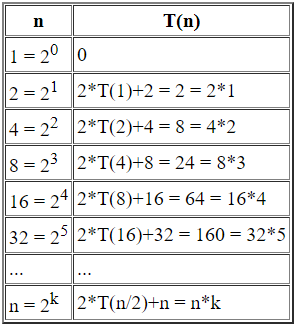

El algoritmo al estar constantemente dividiendo para luego juntar todo nos deja claro que su complejidad temporal es de $O(n log n)$.


# 4. Correctitud
## Teorema (Correctitud).
El algoritmo Merge retorna una sola lista con los mismos elementos de las 2 listas de entrada, pero ordenados de menor a mayor. Los elementos en las listas de entradas ya están en orden.

## Prueba del teorema
En cada iteración de Merge se comparan los elementos de cada lista, y se mueve el menor a una lista nueva que va a contener los elementos ordenados. Teniendo esto en cuenta, se puede probar la siguiente propiedad invariante:

> Al comienzo de cada iteración *i* hay *i* elementos ordenados en la lista de salida *a*. Y los elementos que quedan en las listas de entrada son mayores al elemento en *i*.

## Inicialización
Al comienzo de la primera iteración, donde *i* = 1, hay un sólo elemento en la lista *a*. Este elemento es el mínimo de ambas listas, por lo tanto, se cumple la propiedad.


## Mantención
Aplicando inducción, asumimos que al comienzo de cada iteración se cumple la propiedad.

Durante la iteración, se compara el primer elemento de ambas listas de entradas y se mueve el menor a la lista de salida.

Después de la iteración, el elemento menor queda en la posición *i - 1* y se sigue cumpliendo la propiedad invariable.


## Correctitud de Merge Sort

Probaremos la correctitud de Merge Sort utilizando inducción matemática. Nuestra hipótesis *P(n)* es que Merge Sort retorna la lista de entrada pero en orden de menor a mayor.

En el caso base, cuando *n = 1*, Merge Sort retorna la lista con un sólo elemento. Por lo tanto, se cumple la hipótesis, puesto que la lista ya está ordenada.

Para el paso inductivo probaremos *P(m)*. Si Merge Sort se llama en una lista de largo *n*, también se van a llamar 2 recursivamente de largo *m* = n/2. Por inducción, esas llamadas van a ordenar la lista correctamente. Luego, las listas se juntan usando Merge. Según el teorema, Merge retorna una lista ordenada con los mismos elementos de las listas de entradas, por lo tanto, Merge Sort es correcto.

#5. Experimentos

Ahora realizaremos un numero de experimentos que nos ayudaran a visualizar la eficacia del insertion sort en ciertos aspectos.

##5.1. Numero de comparaciones

En este experimento se comprobara el numero de comparaciones que el **merge sort** necesita realizar para poder ordenar una lista en su totailidad.

Para ello se hizo una grafica en la que se muestra.

* La cantidad de comparaciones del mejor caso calculadas matemáticamente.
* La cantidad de comparaciones realizadas experimentalmente para entradas aleatorias.

Para un problema que tiene un tamaño $n \in [5,20]$

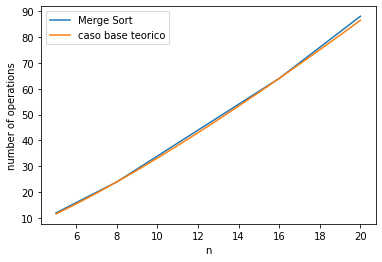

In [48]:
import math
import matplotlib.pyplot as plt
import random

x=[n for n in range(5,21)] 
y1=[n*math.log2(n) for n in range(5,21)] # mejor caso
y=[];

cont = 0

for n in range(5,21):
  a = random.sample(range(1, 100), n)
  a= mergeSort(a)
  y.append(cont)
  cont = 0

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Merge Sort", "caso base teorico"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

##5.2 Tiempo de ejecución experimental

En el siguiente experimento se comprueba si el **merge sort** cumple con el tiempo promedio esperado, que sería un tiempo $O(n log(n))$.

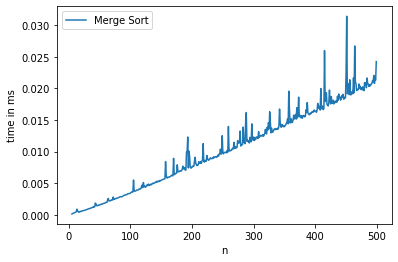

In [50]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random

x=[]; y=[]
x1=[]; y1=[]
x2=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)

  #la función repeat está ejecutando 20 veces cada algoritmo con el arreglo a y retorna el mejor tiepo obtenido para cada uno.
  t = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a},{False})", repeat=1, number=10)

  x.append(n)
  y.append(t)

plt.plot(x,y)
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.legend(["Merge Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()